In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1000, 750, 3)


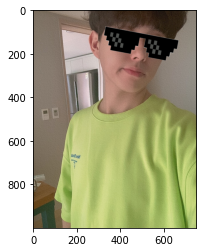

In [2]:
img_path = 'C:/DB/image/its_me.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
model_dir = 'C:/DB/image/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model= semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [4]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [5]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

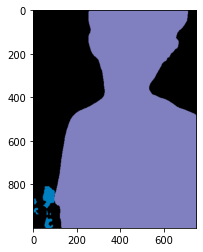

In [6]:
plt.imshow(output)
plt.show()

In [7]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
diningtable
person


In [8]:
# 레이블 부여 및 해당 색상코드 확인
LABEL_NAMES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype = int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

rgb_colormap = np.flip(colormap, axis =1)    # 초기 colormap은 bgr이어서 작업에 용이하게 rgb 버전을 별도 정의.
label_seg_color = dict(zip(LABEL_NAMES,colormap))
rgb_label_seg_color = dict(zip(LABEL_NAMES,rgb_colormap))
print(label_seg_color)
print(f"고양이의 구분색(RGB순)은: {rgb_label_seg_color['dog']}")
print(f"사람의 구분색(RGB순)은: {rgb_label_seg_color['person']}")
dog_seg_color = rgb_label_seg_color['dog']
person_seg_color = rgb_label_seg_color['person']

{'background': array([0, 0, 0]), 'aeroplane': array([128,   0,   0]), 'bicycle': array([  0, 128,   0]), 'bird': array([128, 128,   0]), 'boat': array([  0,   0, 128]), 'bottle': array([128,   0, 128]), 'bus': array([  0, 128, 128]), 'car': array([128, 128, 128]), 'cat': array([64,  0,  0]), 'chair': array([192,   0,   0]), 'cow': array([ 64, 128,   0]), 'diningtable': array([192, 128,   0]), 'dog': array([ 64,   0, 128]), 'horse': array([192,   0, 128]), 'motorbike': array([ 64, 128, 128]), 'person': array([192, 128, 128]), 'pottedplant': array([ 0, 64,  0]), 'sheep': array([128,  64,   0]), 'sofa': array([  0, 192,   0]), 'train': array([128, 192,   0]), 'tv': array([  0,  64, 128])}
고양이의 구분색(RGB순)은: [128   0  64]
사람의 구분색(RGB순)은: [128 128 192]


In [9]:
def obj_segment(img_path, model_file, seg_color):                 
    
    img_orig = cv2.bitwise_not(cv2.imread(img_path))
    #RGB_img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    
    # 분리작업
    from pixellib.semantic import semantic_segmentation
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    seg_map = np.all(output == seg_color, axis = -1)  #axis = -1 : 현재 배열의 마지막 축. -> 색깔축을 의미.
    
    # 이미지 마스크 설정
    img_mask = seg_map.astype(np.uint8)*255 # 마스크를 이진 이미지화.
    binary_mask = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2RGB)
    not_binary_mask = cv2.bitwise_not(binary_mask)
    
    # 사람만 있는 이미지 
    obj = cv2.bitwise_and(binary_mask, img_orig)
    rgb_obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)
    
    # 배경만 있는 이미지 
    bg = cv2.bitwise_and(not_binary_mask, img_orig)
    rgb_bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
        
    return rgb_obj, rgb_bg, img_mask, segvalues

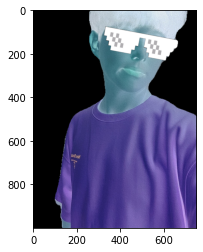

In [10]:
selfy_i, bg_i, mask_i, segvalues_i = obj_segment(img_path, model_file, person_seg_color)

plt.imshow(selfy_i)
plt.show()

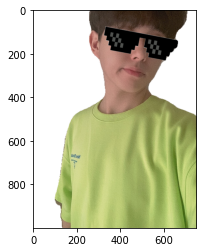

In [11]:
selfy_i =cv2.bitwise_not(selfy_i)

plt.imshow(selfy_i)
plt.show()

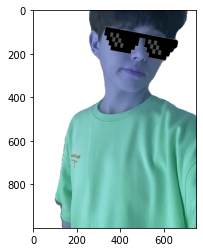

In [12]:
selfy_i = cv2.cvtColor(selfy_i, cv2.COLOR_RGB2BGR)
plt.imshow(selfy_i)
plt.show()

In [13]:
# selfy_i = cv2.cvtColor(selfy_i, cv2.COLOR_BGR2RGB)
# plt.imshow(selfy_i)
# plt.show()

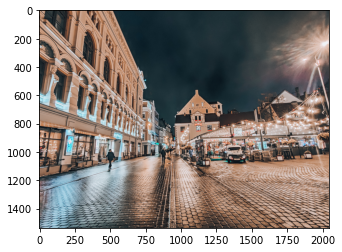

In [14]:
bg_path = 'C:/DB/image/bamgil.jpg'
bg_orig = cv2.imread(bg_path)

plt.imshow(cv2.cvtColor(bg_orig, cv2.COLOR_BGR2RGB))
plt.show()

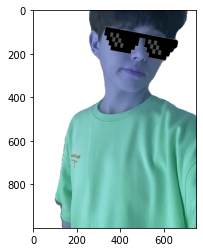

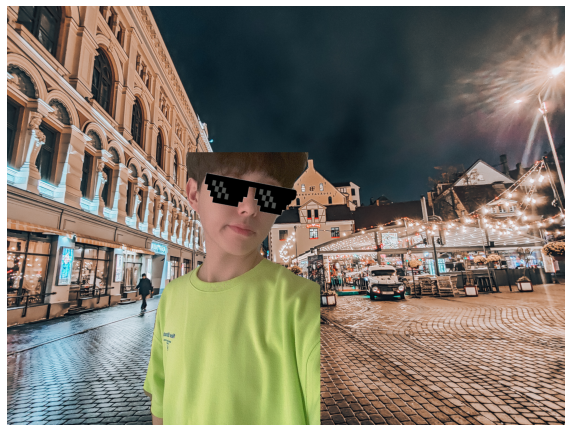

In [15]:
show_bg = bg_orig.copy()
refined_y = 536
refined_x = 400
plt.imshow(selfy_i)
plt.show()
sticker_area = show_bg[refined_y:refined_y+selfy_i.shape[0], refined_x:refined_x+selfy_i.shape[1]]
show_bg[refined_y:refined_y+selfy_i.shape[0], refined_x:refined_x+selfy_i.shape[1]] = np.where(selfy_i==255,sticker_area,selfy_i).astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(show_bg, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [16]:
def bg_puls(sticker,bg,hight,width):
    sticker = cv2.bitwise_not(sticker)
    sticker = cv2.cvtColor(sticker, cv2.COLOR_RGB2BGR)
    bg = bg.copy()
    refined_y = hight
    refined_x = width
    sticker_area = bg[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
    bg[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = np.where(sticker==255,sticker_area,sticker).astype(np.uint8)
    bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
    return bg

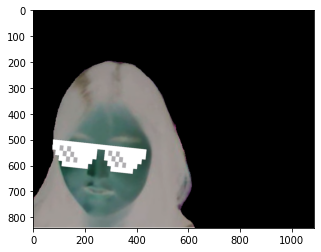

In [17]:
ji_path = 'C:/DB/image/my_meet_background2.png'
ji_orig = cv2.imread(img_path)
only_ji, bg_ji, mask_ji, segvalues_ji = obj_segment(ji_path, model_file, person_seg_color)

plt.imshow(only_ji)
plt.show()

키를 맞추기 위해 추가로 자른 사진의 크기: (641, 610, 3)


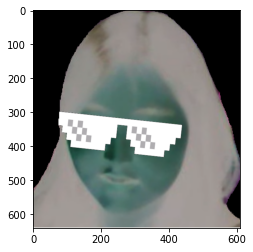

In [18]:
# 사진 자르기 
start_point = (200, 0)   #(세로, 가로) 시작점.
resize_ji = only_ji[start_point[0]:, :610]
print(f'키를 맞추기 위해 추가로 자른 사진의 크기: {resize_ji.shape}')

plt.imshow(resize_ji)
plt.show()

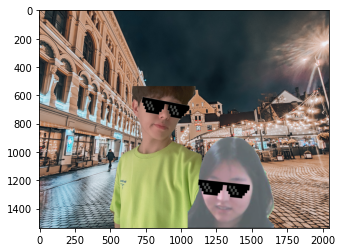

In [19]:
ji_puls = bg_puls(resize_ji,show_bg,895,1050)

plt.imshow(ji_puls)
plt.show()

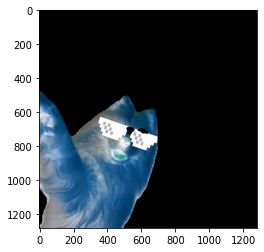

In [20]:
dog_path = 'C:/DB/image/my_meet_background4.png'
dog_orig = cv2.imread(img_path)
only_dog, bg_dog, mask_dog, segvalues_dog = obj_segment(dog_path, model_file, dog_seg_color)

plt.imshow(only_dog)
plt.show()

(1280, 1280, 3)
키를 맞추기 위해 추가로 자른 사진의 크기: (830, 730, 3)


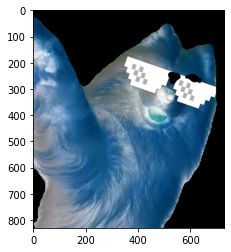

In [21]:
print(only_dog.shape)
# 사진 자르기 
start_point = (450, 0)   #(세로, 가로) 시작점.
resize_dog = only_dog[start_point[0]:, :730]
print(f'키를 맞추기 위해 추가로 자른 사진의 크기: {resize_dog.shape}')

plt.imshow(resize_dog)
plt.show()

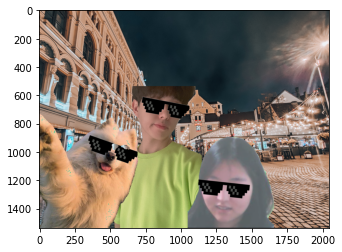

In [22]:
ji_puls = cv2.cvtColor(ji_puls, cv2.COLOR_RGB2BGR)
dog_puls = bg_puls(resize_dog,ji_puls,706,0)
a = dog_puls
plt.imshow(dog_puls)
plt.show()

In [24]:
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
cv2.imwrite('C:/DB/image/final.png',a)

True

키를 맞추기 위해 추가로 자른 사진의 크기: (1006, 1720, 3)


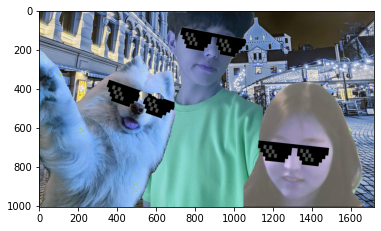

In [29]:
start_point = (530, 0)   #(세로, 가로) 시작점.
resize_a = a[start_point[0]:, :1720]
print(f'키를 맞추기 위해 추가로 자른 사진의 크기: {resize_a.shape}')

plt.imshow(resize_a)
plt.show()

In [30]:
resize_a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
cv2.imwrite('C:/DB/image/resize_final.png',resize_a)

True